ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-34' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=SystemExit(1)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 163, in startup
    server = await loop.create_server(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1536, in create_server
    raise OSError(err.errno, msg) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-24-1efcf6aa9f52>", line 106, in ru

Random Forest Regression Model Performance:
Mean Squared Error: 0.2985
Mean Absolute Error: 0.4322
R-squared Score: 0.5939
Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


Gradient Boosting Regression Model Performance:
Mean Squared Error: 0.2907
Mean Absolute Error: 0.4279
R-squared Score: 0.6044
Best Hyperparameters:
{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


Random Forest Classification Model Performance:
Accuracy: 0.5575

Classification Report:
                     precision    recall  f1-score   support

             Acidic       0.57      0.33      0.41        40
Moderately Alkaline       1.00      0.08      0.15        12
            Neutral       0.21      0.05      0.08        76
    Slightly Acidic       0.51      0.68      0.58       119
  Slightly Alkaline       0.62      0.81      0.70       153

           accuracy                           0.56       400
          macro avg       0.58      0.3

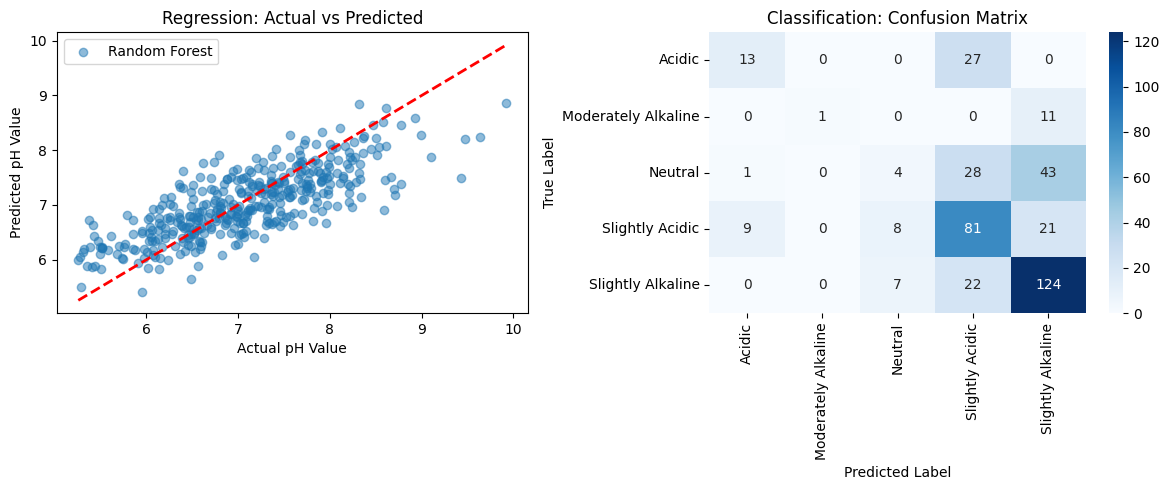

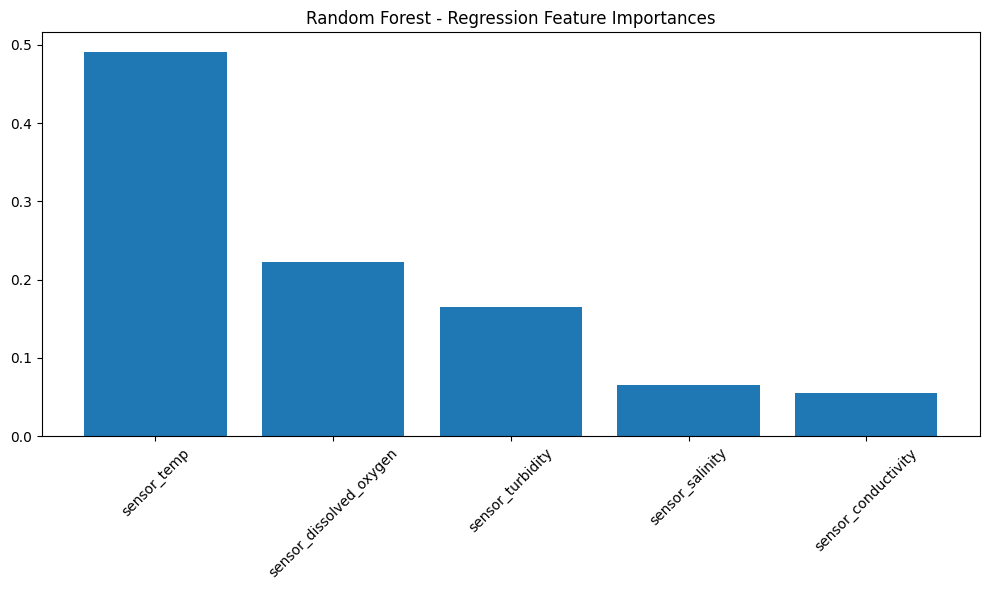

Predicted pH Value: 7.04
Predicted pH Level: Neutral


In [25]:
# Optimized pH Prediction Machine Learning Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    classification_report, confusion_matrix, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Optimize memory usage
import warnings
warnings.filterwarnings('ignore')

# 1. Load and Prepare the Dataset
# Use low_memory=True to optimize memory usage
df = pd.read_csv('ph_prediction_dataset.csv', low_memory=True)

# Select only numeric columns for faster processing
X = df.select_dtypes(include=[np.number]).drop('ph_value', axis=1)
y_value = df['ph_value']

# Encode pH levels
le = LabelEncoder()
y_level = le.fit_transform(df['ph_level'])

# Split the data with stratification for classification
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(
    X, y_value, test_size=0.2, random_state=42
)
X_train_level, X_test_level, y_train_level, y_test_level = train_test_split(
    X, y_level, test_size=0.2, random_state=42, stratify=y_level
)

# Scale the features more efficiently
scaler = StandardScaler()
X_train_scaled_value = scaler.fit_transform(X_train_value)
X_test_scaled_value = scaler.transform(X_test_value)
X_train_scaled_level = scaler.transform(X_train_level)
X_test_scaled_level = scaler.transform(X_test_level)

# 2. Optimized Hyperparameter Spaces
# Reduced parameter combinations and ranges
rf_value_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_level_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_value_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
}

gb_level_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
}

# 3. Optimized Model Training with RandomizedSearchCV
# Reduce computational time by using RandomizedSearchCV
rf_value_grid = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_value_params,
    n_iter=5,  # Reduced number of parameter combinations
    cv=3,      # Reduced cross-validation folds
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)
rf_value_grid.fit(X_train_scaled_value, y_train_value)

gb_value_grid = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_value_params,
    n_iter=5,  # Reduced number of parameter combinations
    cv=3,      # Reduced cross-validation folds
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)
gb_value_grid.fit(X_train_scaled_value, y_train_value)

rf_level_grid = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_level_params,
    n_iter=5,  # Reduced number of parameter combinations
    cv=3,      # Reduced cross-validation folds
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)
rf_level_grid.fit(X_train_scaled_level, y_train_level)

gb_level_grid = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_level_params,
    n_iter=5,  # Reduced number of parameter combinations
    cv=3,      # Reduced cross-validation folds
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)
gb_level_grid.fit(X_train_scaled_level, y_train_level)

# 4. Model Evaluation Functions (Simplified)
def evaluate_regression_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Regression Model Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    print("Best Hyperparameters:")
    print(model.best_params_)
    print("\n")

    return y_pred

def evaluate_classification_model(model, X_test, y_test, model_name, label_encoder):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} Classification Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(
        y_test,
        y_pred,
        target_names=label_encoder.classes_
    ))
    print("Best Hyperparameters:")
    print(model.best_params_)
    print("\n")

    return y_pred

# 5. Evaluate Models
# Regression Models
rf_value_pred = evaluate_regression_model(
    rf_value_grid, X_test_scaled_value, y_test_value, "Random Forest"
)
gb_value_pred = evaluate_regression_model(
    gb_value_grid, X_test_scaled_value, y_test_value, "Gradient Boosting"
)

# Classification Models
rf_level_pred = evaluate_classification_model(
    rf_level_grid, X_test_scaled_level, y_test_level,
    "Random Forest", le
)
gb_level_pred = evaluate_classification_model(
    gb_level_grid, X_test_scaled_level, y_test_level,
    "Gradient Boosting", le
)

# 6. Simplified Visualization
plt.figure(figsize=(12, 5))

# Regression Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test_value, rf_value_pred, alpha=0.5, label='Random Forest')
plt.plot([y_test_value.min(), y_test_value.max()],
         [y_test_value.min(), y_test_value.max()],
         'r--', lw=2)
plt.title('Regression: Actual vs Predicted')
plt.xlabel('Actual pH Value')
plt.ylabel('Predicted pH Value')
plt.legend()

plt.subplot(1, 2, 2)
# Confusion Matrix for Classification
cm = confusion_matrix(y_test_level, rf_level_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Classification: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# 7. Feature Importance (Simplified)
def plot_feature_importance(model, feature_names, model_name, task):
    importances = model.best_estimator_.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} - {task} Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

# Plot feature importance
plot_feature_importance(rf_value_grid, X.columns, "Random Forest", "Regression")

# 8. Prediction Functions (Simplified)
def predict_ph_value(sensor_data):
    """Predict pH value using the best performing regression model"""
    sensor_data_scaled = scaler.transform([sensor_data])
    return gb_value_grid.predict(sensor_data_scaled)[0]

def predict_ph_level(sensor_data):
    """Predict pH level using the best performing classification model"""
    sensor_data_scaled = scaler.transform([sensor_data])
    ph_level_index = gb_level_grid.predict(sensor_data_scaled)[0]
    return le.inverse_transform([ph_level_index])[0]

# Example usage
example_sensor_data = [24.5, 350.0, 12.0, 8.5, 0.4]
predicted_ph_value = predict_ph_value(example_sensor_data)
predicted_ph_level = predict_ph_level(example_sensor_data)

print(f"Predicted pH Value: {predicted_ph_value:.2f}")
print(f"Predicted pH Level: {predicted_ph_level}")


In [26]:
import joblib

# After training your models
joblib.dump(gb_value_grid, 'ph_value_model.joblib')  # Changed value_model to gb_value_grid
joblib.dump(gb_level_grid, 'ph_level_model.joblib') # Changed level_model to gb_level_grid
joblib.dump(scaler, 'ph_scaler.joblib')
joblib.dump(le, 'ph_label_encoder.joblib') # Changed label_encoder to le

['ph_label_encoder.joblib']

In [27]:
import joblib
import numpy as np
import pandas as pd

class PHPredictionModel:
    def __init__(self,
                 value_model_path='ph_value_model.joblib',
                 level_model_path='ph_level_model.joblib',
                 scaler_path='ph_scaler.joblib',
                 encoder_path='ph_label_encoder.joblib'):
        # Load models and preprocessing objects
        self.value_model = joblib.load(value_model_path)
        self.level_model = joblib.load(level_model_path)
        self.scaler = joblib.load(scaler_path)
        self.label_encoder = joblib.load(encoder_path)

    def predict(self, sensor_data):
        # Prepare input data
        input_data = pd.DataFrame([sensor_data])

        # Scale the input data
        input_scaled = self.scaler.transform(input_data)

        # Predict pH value
        ph_value = self.value_model.predict(input_scaled)[0]

        # Predict pH level
        level_index = self.level_model.predict(input_scaled)[0]
        ph_level = self.label_encoder.inverse_transform([level_index])[0]

        # Get prediction confidence
        level_proba = self.level_model.predict_proba(input_scaled)[0]
        confidence = np.max(level_proba)

        return {
            'ph_value': round(ph_value, 2),
            'ph_level': ph_level,
            'confidence': round(float(confidence), 2)
        }

# Initialize the model
ph_model = PHPredictionModel()

# Test cases
test_cases = [
    {
        "sensor_temp": 25.3,
        "sensor_conductivity": 350.5,
        "sensor_turbidity": 12.6,
        "sensor_dissolved_oxygen": 8.2,
        "sensor_salinity": 0.5
    },
    {
        "sensor_temp": 28.7,
        "sensor_conductivity": 420.1,
        "sensor_turbidity": 15.3,
        "sensor_dissolved_oxygen": 9.1,
        "sensor_salinity": 0.7
    }
]

# Test predictions
for i, test_data in enumerate(test_cases, 1):
    print(f"\nTest Case {i}:")
    result = ph_model.predict(test_data)
    print(result)


Test Case 1:
{'ph_value': np.float64(7.02), 'ph_level': 'Neutral', 'confidence': 0.37}

Test Case 2:
{'ph_value': np.float64(7.34), 'ph_level': 'Slightly Alkaline', 'confidence': 0.45}


In [36]:
# Install required libraries
!pip install fastapi uvicorn pydantic python-multipart pyngrok requests

# Import necessary libraries
import nest_asyncio
nest_asyncio.apply()

from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import uvicorn
import joblib
import numpy as np
import pandas as pd
from pyngrok import ngrok
import requests
import threading

# Set up Ngrok Authtoken
# IMPORTANT: Replace with your actual Ngrok Authtoken
ngrok.set_auth_token('2unQo6omaXhxiQOxVI1dRsO7aSp_89zz7vFBnbRvYA6QosFP4')

# Define input model for sensor data
class SensorData(BaseModel):
    sensor_temp: float
    sensor_conductivity: float
    sensor_turbidity: float
    sensor_dissolved_oxygen: float
    sensor_salinity: float

# Create prediction model class
class PHPredictionModel:
    def __init__(self,
                 value_model_path='ph_value_model.joblib',
                 level_model_path='ph_level_model.joblib',
                 scaler_path='ph_scaler.joblib',
                 encoder_path='ph_label_encoder.joblib'):
        # Load models and preprocessing objects
        self.value_model = joblib.load(value_model_path)
        self.level_model = joblib.load(level_model_path)
        self.scaler = joblib.load(scaler_path)
        self.label_encoder = joblib.load(encoder_path)

    def predict(self, sensor_data):
        # Prepare input data
        input_data = pd.DataFrame([sensor_data])

        # Scale the input data
        input_scaled = self.scaler.transform(input_data)

        # Predict pH value
        ph_value = self.value_model.predict(input_scaled)[0]

        # Predict pH level
        level_index = self.level_model.predict(input_scaled)[0]
        ph_level = self.label_encoder.inverse_transform([level_index])[0]

        # Get prediction confidence
        level_proba = self.level_model.predict_proba(input_scaled)[0]
        confidence = np.max(level_proba)

        return {
            'ph_value': round(ph_value, 2),
            'ph_level': ph_level,
            'confidence': round(float(confidence), 2)
        }

# Initialize the model
ph_model = PHPredictionModel()

# Create FastAPI app
app = FastAPI()

# Add CORS middleware
from fastapi.middleware.cors import CORSMiddleware

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"]
)

# Prediction endpoint
@app.post("/predict")
async def predict_ph(sensor_data: SensorData):
    try:
        # Convert Pydantic model to dictionary
        sensor_dict = sensor_data.model_dump()

        # Make prediction
        prediction = ph_model.predict(sensor_dict)

        return prediction
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Health check endpoint
@app.get("/health")
async def health_check():
    return {"status": "healthy"}

# Function to run the server
def run_server():
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)

# Alternative Ngrok connection method
def start_ngrok():
    try:
        # Create a tunnel to port 8000
        tunnel = ngrok.connect(addr="8000",
                               proto="http")
        print(f"Ngrok Tunnel URL: {tunnel}")
        print(f"Public URL: {tunnel.public_url}")
        return tunnel
    except Exception as e:
        print(f"Error creating Ngrok tunnel: {e}")
        return None

# Start the server
server_thread = threading.Thread(target=run_server)
server_thread.start()

# Start Ngrok tunnel
ngrok_tunnel = start_ngrok()

# Test prediction function
def test_prediction():
    if ngrok_tunnel:
        # Prepare test data
        test_data = {
            "sensor_temp": 25.3,
            "sensor_conductivity": 350.5,
            "sensor_turbidity": 12.6,
            "sensor_dissolved_oxygen": 8.2,
            "sensor_salinity": 0.5
        }

        try:
            # Use the ngrok public URL
            public_url = ngrok_tunnel.public_url
            predict_url = f"{public_url}/predict"

            # Make prediction request
            response = requests.post(predict_url, json=test_data)
            print("Prediction Response:")
            print(response.json())
        except Exception as e:
            print(f"Error in prediction: {e}")
    else:
        print("Ngrok tunnel not established")

# Uncomment to test prediction
# test_prediction()

print("Server is running. API is ready to accept predictions.")

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-61' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    s

INFO:     Started server process [466]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


Ngrok Tunnel URL: NgrokTunnel: "https://7d53-34-139-21-227.ngrok-free.app" -> "http://localhost:8000"
Public URL: https://7d53-34-139-21-227.ngrok-free.app
Server is running. API is ready to accept predictions.


In [44]:
# Install required libraries
!pip install fastapi uvicorn pydantic python-multipart pyngrok requests

# Import necessary libraries
import nest_asyncio
nest_asyncio.apply()

from fastapi import FastAPI, HTTPException, Request
from fastapi.responses import HTMLResponse, JSONResponse
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
import uvicorn
import joblib
import numpy as np
import pandas as pd
from pyngrok import ngrok
import requests
import threading
import socket

# Function to find an available port
def find_free_port():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind(('', 0))
        s.listen(1)
        port = s.getsockname()[1]
    return port

# Find a free port
FREE_PORT = find_free_port()
print(f"Using port {FREE_PORT}")

# Set up Ngrok Authtoken
ngrok.kill()  # Kill existing ngrok processes
ngrok.set_auth_token('2unQo6omaXhxiQOxVI1dRsO7aSp_89zz7vFBnbRvYA6QosFP4')

# Define input model for sensor data
class SensorData(BaseModel):
    sensor_temp: float
    sensor_conductivity: float
    sensor_turbidity: float
    sensor_dissolved_oxygen: float
    sensor_salinity: float

# Create prediction model class
class PHPredictionModel:
    def __init__(self,
                 value_model_path='ph_value_model.joblib',
                 level_model_path='ph_level_model.joblib',
                 scaler_path='ph_scaler.joblib',
                 encoder_path='ph_label_encoder.joblib'):
        # Load models and preprocessing objects
        self.value_model = joblib.load(value_model_path)
        self.level_model = joblib.load(level_model_path)
        self.scaler = joblib.load(scaler_path)
        self.label_encoder = joblib.load(encoder_path)

    def predict(self, sensor_data):
        # Prepare input data
        input_data = pd.DataFrame([sensor_data])

        # Scale the input data
        input_scaled = self.scaler.transform(input_data)

        # Predict pH value
        ph_value = self.value_model.predict(input_scaled)[0]

        # Predict pH level
        level_index = self.level_model.predict(input_scaled)[0]
        ph_level = self.label_encoder.inverse_transform([level_index])[0]

        # Get prediction confidence
        level_proba = self.level_model.predict_proba(input_scaled)[0]
        confidence = np.max(level_proba)

        return {
            'ph_value': round(ph_value, 2),
            'ph_level': ph_level,
            'confidence': round(float(confidence), 2)
        }

# Initialize the model
ph_model = PHPredictionModel()

# Create FastAPI app
app = FastAPI()

# Add CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"]
)

# Root endpoint with interactive HTML
@app.get("/", response_class=HTMLResponse)
async def root():
    return """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>pH Prediction Model</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                max-width: 600px;
                margin: 0 auto;
                padding: 20px;
                line-height: 1.6;
            }
            .form-group {
                margin-bottom: 15px;
            }
            input {
                width: 100%;
                padding: 8px;
                margin-top: 5px;
            }
            button {
                width: 100%;
                padding: 10px;
                background-color: #4CAF50;
                color: white;
                border: none;
                cursor: pointer;
            }
            #result {
                margin-top: 20px;
                padding: 15px;
                background-color: #f4f4f4;
                border-radius: 5px;
            }
        </style>
    </head>
    <body>
        <h1>pH Prediction Model</h1>
        <form id="predictionForm">
            <div class="form-group">
                <label for="sensorTemp">Sensor Temperature:</label>
                <input type="number" id="sensorTemp" step="0.1" required>
            </div>
            <div class="form-group">
                <label for="sensorConductivity">Sensor Conductivity:</label>
                <input type="number" id="sensorConductivity" step="0.1" required>
            </div>
            <div class="form-group">
                <label for="sensorTurbidity">Sensor Turbidity:</label>
                <input type="number" id="sensorTurbidity" step="0.1" required>
            </div>
            <div class="form-group">
                <label for="sensorDissolvedOxygen">Dissolved Oxygen:</label>
                <input type="number" id="sensorDissolvedOxygen" step="0.1" required>
            </div>
            <div class="form-group">
                <label for="sensorSalinity">Sensor Salinity:</label>
                <input type="number" id="sensorSalinity" step="0.1" required>
            </div>
            <button type="submit">Predict pH</button>
        </form>
        <div id="result"></div>

        <script>
            document.getElementById('predictionForm').addEventListener('submit', async (e) => {
                e.preventDefault();
                const resultDiv = document.getElementById('result');

                const data = {
                    sensor_temp: parseFloat(document.getElementById('sensorTemp').value),
                    sensor_conductivity: parseFloat(document.getElementById('sensorConductivity').value),
                    sensor_turbidity: parseFloat(document.getElementById('sensorTurbidity').value),
                    sensor_dissolved_oxygen: parseFloat(document.getElementById('sensorDissolvedOxygen').value),
                    sensor_salinity: parseFloat(document.getElementById('sensorSalinity').value)
                };

                try {
                    const response = await fetch('/predict', {
                        method: 'POST',
                        headers: {
                            'Content-Type': 'application/json',
                        },
                        body: JSON.stringify(data)
                    });

                    const result = await response.json();
                    resultDiv.innerHTML = `
                        <h2>Prediction Results</h2>
                        <p><strong>pH Value:</strong> ${result.ph_value}</p>
                        <p><strong>pH Level:</strong> ${result.ph_level}</p>
                        <p><strong>Confidence:</strong> ${(result.confidence * 100).toFixed(2)}%</p>
                    `;
                } catch (error) {
                    resultDiv.innerHTML = `<p>Error: ${error.message}</p>`;
                }
            });
        </script>
    </body>
    </html>
    """

# Prediction endpoint
@app.post("/predict")
async def predict_ph(sensor_data: SensorData):
    try:
        # Convert Pydantic model to dictionary
        sensor_dict = sensor_data.model_dump()

        # Make prediction
        prediction = ph_model.predict(sensor_dict)

        return prediction
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Health check endpoint
@app.get("/health")
async def health_check():
    return {"status": "healthy", "message": "API is running"}

# Function to run the server
def run_server():
    uvicorn.run(app, host="0.0.0.0", port=FREE_PORT)

# Alternative Ngrok connection method
def start_ngrok():
    try:
        # Create a tunnel to the free port
        tunnel = ngrok.connect(
            addr=str(FREE_PORT),
            proto="http",
            bind_tls=True
        )
        print(f"Ngrok Tunnel URL: {tunnel}")
        print(f"Public URL: {tunnel.public_url}")
        return tunnel
    except Exception as e:
        print(f"Ngrok Tunnel Creation Error: {e}")
        return None

# Start the server
server_thread = threading.Thread(target=run_server)
server_thread.start()

# Start Ngrok tunnel
ngrok_tunnel = start_ngrok()

print("Server Initialization Complete. Waiting for connections...")

Using port 41303


INFO:     Started server process [466]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:41303 (Press CTRL+C to quit)


Ngrok Tunnel URL: NgrokTunnel: "https://2e13-34-139-21-227.ngrok-free.app" -> "http://localhost:41303"
Public URL: https://2e13-34-139-21-227.ngrok-free.app
Server Initialization Complete. Waiting for connections...
